# Analysis Data dari Sumber :
https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv

**Import Packages**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

**Import Data**

In [ ]:
data = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K



1. UNIVARIATE ANALYSIS UNTUK KATEGORI "HOURS PER-WEEK" DAN "INCOME.


2. BIVARIATE ANALYSIS UNTUK HUBUNGAN ANTARA "HOURS PER-WEEK" DAN "INCOME"

**1.1** HOURS PER-WEEK

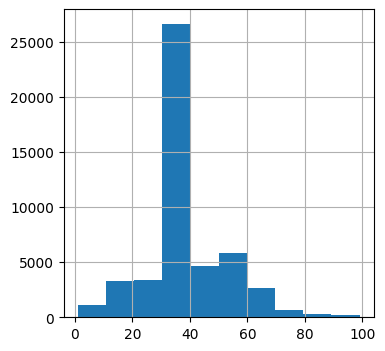

In [ ]:
# Analisis untuk 'hours per week'
data['hours-per-week'].hist(figsize=(4,4))
plt.show()

Penjelasan : pada histogram tersebut kita dapat melihat bahwa mayoritas orang yang berkerja pada kolom "hours per week" berada di kisaran 30 sampai 40 jam per minggu.

**1.2** INCOME

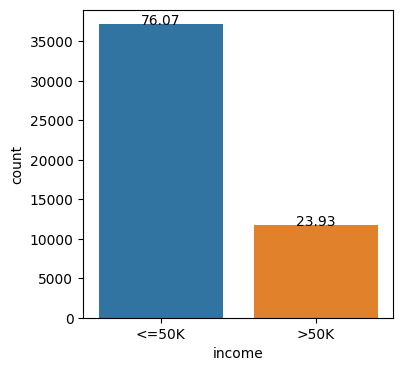

In [ ]:
plt.figure(figsize=(4,4))
total = float(len(data))

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height + 3,
          '{:1.2f}'.format((height/total)*100),
          ha="center")
plt.show()



Penjelasan : dari histogram income terlihat bahwa terdapat 76.07% populasi yang memilki income kurang dari sama dengan 50K dan 23.93% populasi yang memiliki income diatas 50K.

**2.1 BIVARIATE ANALYSIS**

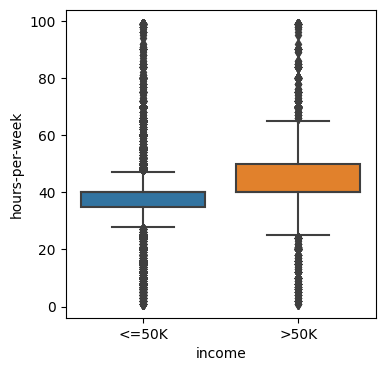

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

Grafik boxplot ini menunjukkan distribusi pendapatan untuk dua kelompok orang, yaitu mereka yang menghasilkan kurang dari USD 50k dan mereka yang menghasilkan lebih dari USD 50k. Grafik ini dibagi menjadi dua bagian, satu untuk setiap kelompok.

Sumbu horizontal mewakili pendapatan dan sumbu vertikal mewakili jumlah orang dalam setiap kelompok. Boxplot menunjukkan median, rentang interkuartil, dan pencilan untuk setiap kelompok.


### **2.2 Uji Hipotesis (untuk mengetahui hubungan antara Hours-Per-Week dan Income)**

Null Hypothesis : tidak ada perbedaan Rerata kelompok pendapatan >50K dan kelompok pendapatan <=50k.

Alternate Hypothesis : ada perbedaan Rerata kelompok pendapatan >50k dan kelompok pendapatan <=50k

In [ ]:
import random

data = data[(np.abs(stats.zscore(data["hours-per-week"])) < 3)]

income_0 = data[data['income'] == '<=50K']['hours-per-week']
income_1 = data[data['income'] == '>50K']['hours-per-week']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1, income_0, equal_var = False)
print("ttest", ttest)
print("p-value", pval)

if pval < 0.05:
  print("null hypothesis ditolak")
else :
  print("null hypothesis diterima")

ttest 3.852826049843033
p-value 0.00016022914097900867
null hypothesis ditolak



KESIMPULAN
---
berdasarkan analysis data yang telah saya lakukan diatas, berikut kesimpulan yang telah saya ambil:

1. dari grafik histogram "hours per week" yang telah dibuat terllihat bahwa sebagian besar Populasi Perkerja berkerja selama 30 sampai 40 jam setiap minggunya.

2. Dengan memanfaatkan histogram dari distribusi pendapatan, kita bisa mendapatkan pemahaman tentang sebaran individu di setiap kelas pendapatan.

3. Dengan menganalisis korelasi antara “jam kerja per minggu” dan “pendapatan”, kita dapat mengamati bagaimana variasi dalam jam kerja per minggu antara individu dengan pendapatan kurang dari atau sama dengan 50K USD dan mereka yang memiliki pendapatan lebih dari 50K USD.

4. Melalui pengujian hipotesis, kita dapat mengetahui apakah terdapat perbedaan yang signifikan dalam jam kerja per minggu antara dua grup pendapatan. Hasil dari pengujian hipotesis ini dapat membantu kita dalam menentukan apakah hipotesis nol (tidak ada perbedaan) atau hipotesis alternatif (ada perbedaan) yang lebih mungkin.

